In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

nazwy_plikow=["./pomiary/forward_1_INSIGHT_140039_2021.10.12T14.00.28+02.00.md.mc.pm.fe.bp.csv","./pomiary/forward_2_INSIGHT_140039_2021.10.12T14.01.29+02.00.md.mc.pm.fe.bp.csv","./pomiary/forward_3_INSIGHT_140039_2021.10.12T14.02.50+02.00.md.mc.pm.fe.bp.csv","./pomiary/left_1_INSIGHT_140039_2021.10.12T13.56.06+02.00.md.mc.pm.fe.bp.csv","./pomiary/left_2_INSIGHT_140039_2021.10.12T13.57.27+02.00.md.mc.pm.fe.bp.csv","./pomiary/left_3_INSIGHT_140039_2021.10.12T13.58.41+02.00.md.mc.pm.fe.bp.csv","./pomiary/neutral_1_INSIGHT_140039_2021.10.12T13.50.46+02.00.md.mc.pm.fe.bp.csv","./pomiary/neutral_2_INSIGHT_140039_2021.10.12T13.51.42+02.00.md.mc.pm.fe.bp.csv","./pomiary/neutral_3_INSIGHT_140039_2021.10.12T14.04.02+02.00.md.mc.pm.fe.bp.csv","./pomiary/right_2_INSIGHT_140039_2021.10.12T13.46.43+02.00.md.mc.pm.fe.bp.csv","./pomiary/right_3_INSIGHT_140039_2021.10.12T13.47.47+02.00.md.mc.pm.fe.bp.csv","./pomiary/right_4_INSIGHT_140039_2021.10.12T13.49.16+02.00.md.mc.pm.fe.bp.csv"]
etykiety=["forward","left","neutral", "right"]
nazwy_plikow2=["./pom2311/0.csv","./pom2311/1.csv","./pom2311/2.csv","./pom2311/3.csv","./pom2311/4.csv","./pom2311/5.csv","./pom2311/6.csv","./pom2311/7.csv"]
nazwy_plikow3=["./pom2311_1/0.csv","./pom2311_1/1.csv","./pom2311_1/2.csv","./pom2311_1/3.csv","./pom2311_1/4.csv","./pom2311_1/5.csv","./pom2311_1/6.csv","./pom2311_1/7.csv"]
etykiety2=["0","1","2","3","4","5","6","7"]
def load_data(csv_path = "./pom2311/0.csv"):
    return pd.read_csv(csv_path)

def data_drop(eeg=load_data(),label="0"):
    data = eeg.drop(eeg.loc[:, "EEG.RawCq":"POW.AF4.Gamma"].columns, axis = 1)
    data =data.drop(data.loc[:,"Timestamp":"EEG.Interpolated"].columns, axis = 1)
    data['etykieta']=label
    return data

def data_drop2(eeg=load_data(),label="right"):
    data = eeg.drop(eeg.loc[:, "Timestamp":"FE.LowerFaceActionPower"].columns, axis = 1)
    data=data.dropna()
    data['etykieta']=label    
    return data

def plot_data(data=data_drop2()):
    data.plot(figsize=(10, 15))
    
def plot_data2(eeg=data_drop2(),label="right"):
    eeg["POW.AF3.Alpha"].plot(label="alpha")
    eeg["POW.AF3.Theta"].plot(label="theta")
    eeg["POW.AF3.BetaL"].plot(label="betaL")
    eeg["POW.AF3.BetaH"].plot(label="betaH")
    eeg["POW.AF3.Gamma"].plot(label="gamma")
    plt.legend()
    plt.title(label+" AF3")
    plt.show()
    eeg["POW.AF4.Alpha"].plot(label="alpha")
    eeg["POW.AF4.Theta"].plot(label="theta")
    eeg["POW.AF4.BetaL"].plot(label="betaL")
    eeg["POW.AF4.BetaH"].plot(label="betaH")
    eeg["POW.AF4.Gamma"].plot(label="gamma")
    plt.legend()
    plt.title(label+" AF4")
    plt.show()
    eeg["POW.T7.Alpha"].plot(label="alpha")
    eeg["POW.T7.Theta"].plot(label="theta")
    eeg["POW.T7.BetaL"].plot(label="betaL")
    eeg["POW.T7.BetaH"].plot(label="betaH")
    eeg["POW.T7.Gamma"].plot(label="gamma")
    plt.legend()
    plt.title(label+" T7")
    plt.show()
    eeg["POW.T8.Alpha"].plot(label="alpha")
    eeg["POW.T8.Theta"].plot(label="theta")
    eeg["POW.T8.BetaL"].plot(label="betaL")
    eeg["POW.T8.BetaH"].plot(label="betaH")
    eeg["POW.T8.Gamma"].plot(label="gamma")
    plt.legend()
    plt.title(label+" T8")
    plt.show()
    eeg["POW.Pz.Alpha"].plot(label="alpha")
    eeg["POW.Pz.Theta"].plot(label="theta")
    eeg["POW.Pz.BetaL"].plot(label="betaL")
    eeg["POW.Pz.BetaH"].plot(label="betaH")
    eeg["POW.Pz.Gamma"].plot(label="gamma")
    plt.legend()
    plt.title(label+" Pz")
    plt.show()
    
def hist_data(data=data_drop()):
    data.hist(bins=50, figsize=(20,15))
    #plt.show()
    
def append_data():
    big_data=pd.DataFrame(columns=['EEG.AF3', 'EEG.T7', 'EEG.Pz', 'EEG.T8', 'EEG.AF4','etykieta'])
    for i in range(1,5):
        for j in range(1,4):
            big_data=big_data.append(data_drop(eeg=load_data(nazwy_plikow[i*j-1]),label=etykiety[i-1]))
    return big_data

def append_data1(first,second):
    big_data=pd.DataFrame(columns=['EEG.AF3', 'EEG.T7', 'EEG.Pz', 'EEG.T8', 'EEG.AF4','etykieta'])
    big_data=big_data.append(data_drop(eeg=load_data(nazwy_plikow3[first]),label="first"))
    big_data=big_data.append(data_drop(eeg=load_data(nazwy_plikow3[second]),label="second"))
    return big_data

def append_data1_three(first,second,third):
    big_data=pd.DataFrame(columns=['EEG.AF3', 'EEG.T7', 'EEG.Pz', 'EEG.T8', 'EEG.AF4','etykieta'])
    big_data=big_data.append(data_drop(eeg=load_data(nazwy_plikow3[0]),label=0))
    big_data=big_data.append(data_drop(eeg=load_data(nazwy_plikow3[first]),label=first))
    big_data=big_data.append(data_drop(eeg=load_data(nazwy_plikow3[second]),label=second))
    big_data=big_data.append(data_drop(eeg=load_data(nazwy_plikow3[third]),label=third))
    return big_data

def append_data1_all():
    big_data=pd.DataFrame(columns=['EEG.AF3', 'EEG.T7', 'EEG.Pz', 'EEG.T8', 'EEG.AF4','etykieta'])
    for i in range(8):
        big_data=big_data.append(data_drop(eeg=load_data(nazwy_plikow3[i]),label=i))
    return big_data

def append_data2():
    big_data=pd.DataFrame(columns=['POW.AF3.Theta','POW.AF3.Alpha', 'POW.AF3.BetaL', 'POW.AF3.BetaH', 'POW.AF3.Gamma', 'POW.T7.Theta','POW.T7.Alpha', 'POW.T7.BetaL', 'POW.T7.BetaH', 'POW.T7.Gamma','POW.Pz.Theta','POW.Pz.Alpha', 'POW.Pz.BetaL', 'POW.Pz.BetaH', 'POW.Pz.Gamma','POW.T8.Theta','POW.T8.Alpha', 'POW.T8.BetaL', 'POW.T8.BetaH', 'POW.T8.Gamma','POW.AF4.Theta','POW.AF4.Alpha', 'POW.AF4.BetaL', 'POW.AF4.BetaH', 'POW.AF4.Gamma','etykieta'])
    for i in range(1,5):
        for j in range(1,4):
            big_data=big_data.append(data_drop2(eeg=load_data(nazwy_plikow[i*j-1]),label=etykiety[i-1]))
    return big_data

def append_dataVar(first,second,third):
    big_data=pd.DataFrame(columns=['EEG.AF3', 'EEG.T7', 'EEG.Pz', 'EEG.T8', 'EEG.AF4','etykieta'])
    eeg=load_data("./pom2311_1_var/0.csv")
    eeg['etykieta']=0
    big_data=big_data.append(eeg)
    eeg=load_data("./pom2311_1_var/"+str(first)+".csv")
    eeg['etykieta']=first
    big_data=big_data.append(eeg)
    eeg=load_data("./pom2311_1_var/"+str(second)+".csv")
    eeg['etykieta']=second
    big_data=big_data.append(eeg)
    eeg=load_data("./pom2311_1_var/"+str(third)+".csv")
    eeg['etykieta']=third
    big_data=big_data.append(eeg)
    big_data=big_data.drop("Unnamed: 0",axis=1)
    return big_data

def append_dataBand(first,second,third):
    big_data=pd.DataFrame(columns=['EEG.AF3/Theta','EEG.AF3/Alpha','EEG.AF3/BetaL','EEG.AF3/BetaH','EEG.AF3/Gamma','EEG.T7/Theta','EEG.T7/Alpha','EEG.T7/BetaL','EEG.T7/BetaH','EEG.T7/Gamma','EEG.Pz/Theta','EEG.Pz/Alpha','EEG.Pz/BetaL','EEG.Pz/BetaH','EEG.Pz/Gamma','EEG.T8/Theta','EEG.T8/Alpha','EEG.T8/BetaL','EEG.T8/BetaH','EEG.T8/Gamma','EEG.AF4/Theta','EEG.AF4/Alpha','EEG.AF4/BetaL','EEG.AF4/BetaH','EEG.AF4/Gamma','etykieta'])
    eeg=load_data("./pom2311_1_band/0.csv")
    eeg['etykieta']=0
    big_data=big_data.append(eeg)
    eeg=load_data("./pom2311_1_band/"+str(first)+".csv")
    eeg['etykieta']=first
    big_data=big_data.append(eeg)
    eeg=load_data("./pom2311_1_band/"+str(second)+".csv")
    eeg['etykieta']=second
    big_data=big_data.append(eeg)
    eeg=load_data("./pom2311_1_band/"+str(third)+".csv")
    eeg['etykieta']=third
    big_data=big_data.append(eeg)
    big_data=big_data.drop("Unnamed: 0",axis=1)
    return big_data

def append_dataFFT(first,second,third):
    #big_data=pd.DataFrame(columns=['EEG.AF3', 'EEG.T7', 'EEG.Pz', 'EEG.T8', 'EEG.AF4','etykieta'])
    eeg=load_data("./pom2311_1_fft/0.csv")
    eeg['etykieta']=0
    big_data=eeg
    eeg=load_data("./pom2311_1_fft/"+str(first)+".csv")
    eeg['etykieta']=first
    big_data=big_data.append(eeg)
    eeg=load_data("./pom2311_1_fft/"+str(second)+".csv")
    eeg['etykieta']=second
    big_data=big_data.append(eeg)
    eeg=load_data("./pom2311_1_fft/"+str(third)+".csv")
    eeg['etykieta']=third
    big_data=big_data.append(eeg)
    big_data=big_data.drop("Unnamed: 0",axis=1)
    return big_data

def append_dataF(first,second,third):
    big_data=pd.DataFrame(columns=['POW.AF3.Theta','POW.AF3.Alpha', 'POW.AF3.BetaL', 'POW.AF3.BetaH', 'POW.AF3.Gamma', 'POW.T7.Theta','POW.T7.Alpha', 'POW.T7.BetaL', 'POW.T7.BetaH', 'POW.T7.Gamma','POW.Pz.Theta','POW.Pz.Alpha', 'POW.Pz.BetaL', 'POW.Pz.BetaH', 'POW.Pz.Gamma','POW.T8.Theta','POW.T8.Alpha', 'POW.T8.BetaL', 'POW.T8.BetaH', 'POW.T8.Gamma','POW.AF4.Theta','POW.AF4.Alpha', 'POW.AF4.BetaL', 'POW.AF4.BetaH', 'POW.AF4.Gamma','etykieta'])
    big_data=big_data.append(data_drop2(eeg=load_data(nazwy_plikow3[0]),label=0))
    big_data=big_data.append(data_drop2(eeg=load_data(nazwy_plikow3[first]),label=first))
    big_data=big_data.append(data_drop2(eeg=load_data(nazwy_plikow3[second]),label=second))
    big_data=big_data.append(data_drop2(eeg=load_data(nazwy_plikow3[third]),label=third))
    return big_data

def max_reg(df):
    id=df.idxmax(axis = 1)
    for col in df.columns:
        df[col].values[:] = 0
    for index, row in df.iterrows():
        df.at[index, id[index]] = 1
    return df

def display_scores(scores):
    print("Wyniki:", scores)
    print("Średnia:", scores.mean())
    print("Odchylenie standardowe:", scores.std())
    return scores.mean()

def var(plik):
    dane=data_drop(eeg=load_data(nazwy_plikow3[plik]),label=plik).drop("etykieta",1)
    #dane=dane.drop(chain(range(12),range(268,2619)),axis=0)
    #dane-=dane.mean()
    dane_1s = pd.DataFrame(dane[:96],columns=['EEG.AF3', 'EEG.T7', 'EEG.Pz', 'EEG.T8', 'EEG.AF4'])
    wariancja = pd.DataFrame(columns=['EEG.AF3', 'EEG.T7', 'EEG.Pz', 'EEG.T8', 'EEG.AF4'])
    for i in range (96,2620,32):
        dane_1s = dane_1s.append(dane[i:i+32])
        s2 = np.var(dane_1s, ddof=1)
        dane_1s = dane_1s.iloc[32:]
        wariancja = wariancja.append(pd.DataFrame(np.sqrt(s2)).T)
        #print(s2)
        #print(np.sqrt(s2))
    #print(wariancja) 
    wariancja.to_csv('./pom2311_1_var/'+str(plik)+'.csv')
    
def fft(plik):
    import numpy as np
    import scipy.signal as sig
    from scipy.io import wavfile

    fs=128
    f = np.fft.rfftfreq(128, 1/fs)[4:46]
    nazwy_kolumn = ['-']*210
    iter=0
    elektrody=["EEG.AF3","EEG.T7","EEG.Pz","EEG.T8","EEG.AF4"]
    for ele in elektrody:
        for hz in f:
            nazwy_kolumn[iter] = ele+'_'+str(int(hz))+'Hz'
            iter+=1
    fft=pd.DataFrame(columns=nazwy_kolumn)

    dane=data_drop(eeg=load_data(nazwy_plikow3[plik]),label=plik).drop("etykieta",1)
    dane-=dane.mean()
    dane_1s = pd.DataFrame(dane[:96],columns=['EEG.AF3', 'EEG.T7', 'EEG.Pz', 'EEG.T8', 'EEG.AF4'])   
    for k in range (96,2620,32):
        fft_1s=[0]*210
        dane_1s = dane_1s.append(dane[k:k+32])
        #dane_1s-=dane_1s.mean()
        for i in range(5):
            widmo_amp = np.abs(np.fft.rfft(dane_1s[elektrody[i]]))[4:46] / 64
            for j in range(42):
                fft_1s[i*42+j]=widmo_amp[j]
        dane_1s = dane_1s.iloc[32:]        
        fft_1s = np.array(fft_1s).reshape(1, -1)
        fft_1s = pd.DataFrame(fft_1s, columns=nazwy_kolumn)
        fft=fft.append(fft_1s)
    #print(fft)
    fft.to_csv('./pom2311_1_fft/'+str(plik)+'.csv')
    
def fft_band(plik):
    import numpy as np
    import scipy.signal as sig
    from scipy.io import wavfile

    fs=128
    f = np.fft.rfftfreq(128, 1/fs)[4:46]
    nazwy_kolumn = ['-']*210
    nazwy_kolumn_band = ['-']*25
    iter=0
    iter2=0
    elektrody=["EEG.AF3","EEG.T7","EEG.Pz","EEG.T8","EEG.AF4"]
    pasma=["Theta","Alpha","BetaL","BetaH","Gamma"]
    for ele in elektrody:
        for hz in f:
            nazwy_kolumn[iter] = ele+'_'+str(int(hz))+'Hz'
            iter+=1
        for i in range(5):
            nazwy_kolumn_band[iter2] = ele+'/'+pasma[i]
            iter2+=1    
    fft=pd.DataFrame(columns=nazwy_kolumn)
    band=pd.DataFrame(columns=nazwy_kolumn_band)
    dane=data_drop(eeg=load_data(nazwy_plikow3[plik]),label=plik).drop("etykieta",1)
    dane-=dane.mean()
    dane_1s = pd.DataFrame(dane[:96],columns=['EEG.AF3', 'EEG.T7', 'EEG.Pz', 'EEG.T8', 'EEG.AF4'])   
    for k in range (96,2620,32):
        fft_1s=[0]*210
        band1s=[0]*25
        dane_1s = dane_1s.append(dane[k:k+32])
        #dane_1s-=dane_1s.mean()
        for i in range(5):
            widmo_amp = np.abs(np.fft.rfft(dane_1s[elektrody[i]]))[4:46] / 64
            band1s[i*5+0]=widmo_amp[0]+widmo_amp[1]+widmo_amp[2]+widmo_amp[3]+widmo_amp[4] #4-8Hz Theta
            band1s[i*5+1]=widmo_amp[4]+widmo_amp[5]+widmo_amp[6]+widmo_amp[7]+widmo_amp[8] #8-12Hz Alpha
            band1s[i*5+2]=widmo_amp[8]+widmo_amp[9]+widmo_amp[10]+widmo_amp[11]+widmo_amp[12] #12-16Hz BetaL
            band1s[i*5+3]=widmo_amp[12]+widmo_amp[13]+widmo_amp[14]+widmo_amp[15]+widmo_amp[16]+widmo_amp[17]+widmo_amp[18]+widmo_amp[19]+widmo_amp[20]+widmo_amp[21] #16-25Hz BetaH
            band1s[i*5+4]=widmo_amp[21]+widmo_amp[22]+widmo_amp[23]+widmo_amp[24]+widmo_amp[25]+widmo_amp[26]+widmo_amp[27]+widmo_amp[28]+widmo_amp[29]+widmo_amp[30]+widmo_amp[31]+widmo_amp[32]+widmo_amp[33]+widmo_amp[34]+widmo_amp[35]+widmo_amp[36]+widmo_amp[37]+widmo_amp[38]+widmo_amp[39]+widmo_amp[40]+widmo_amp[41] #25-45Hz Gamma
            band1s[i*5+0]/=5
            band1s[i*5+1]/=5
            band1s[i*5+2]/=5
            band1s[i*5+3]/=10
            band1s[i*5+4]/=21
            for j in range(42):
                fft_1s[i*42+j]=widmo_amp[j]
        dane_1s = dane_1s.iloc[32:]        
        fft_1s = np.array(fft_1s).reshape(1, -1)
        fft_1s = pd.DataFrame(fft_1s, columns=nazwy_kolumn)
        fft=fft.append(fft_1s)
        band1s = np.array(band1s).reshape(1, -1)
        band1s = pd.DataFrame(band1s, columns=nazwy_kolumn_band)
        band=band.append(band1s)
    #fft.to_csv('./pom2311_1_fft/'+str(plik)+'.csv')
    band.to_csv('./pom2311_1_band/'+str(plik)+'.csv')

In [3]:
eeg0=data_drop()
print(eeg0)
eeg1=data_drop(load_data("./pom2311/1.csv"),"1")
print(eeg1)
eeg01=append_data1(0,1)
print(eeg01)

          EEG.AF3       EEG.T7       EEG.Pz       EEG.T8      EEG.AF4 etykieta
0     4191.282227  4216.410156  4122.051270  4504.102539  4215.384766        0
1     4184.615234  4218.461426  4124.615234  4508.205078  4217.948730        0
2     4192.820313  4229.743652  4135.897461  4512.307617  4226.666504        0
3     4212.307617  4233.333496  4126.666504  4511.282227  4229.743652        0
4     4204.102539  4223.589844  4120.512695  4506.666504  4219.487305        0
...           ...          ...          ...          ...          ...      ...
3285  4180.512695  4141.538574  4077.435791  4085.128174  4200.000000        0
3286  4161.538574  4135.897461  4071.794922  4062.051270  4170.769043        0
3287  4134.358887  4123.589844  4049.743652  4058.974365  4142.051270        0
3288  4139.487305  4124.615234  4054.871826  4076.923096  4148.717773        0
3289  4140.000000  4120.000000  4047.179443  4073.333252  4141.025879        0

[3290 rows x 6 columns]
          EEG.AF3       EEG

In [4]:
nd_with_id = eeg01.reset_index().reset_index().drop(["index"], axis = 1)
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(nd_with_id, nd_with_id["etykieta"]):
    strat_train_set = nd_with_id.loc[train_index]
    strat_test_set = nd_with_id.loc[test_index]
    
print(strat_test_set["etykieta"].value_counts() /len(strat_test_set))    
print(nd_with_id["etykieta"].value_counts() /len(nd_with_id))  

first     0.5
second    0.5
Name: etykieta, dtype: float64
second    0.5
first     0.5
Name: etykieta, dtype: float64


In [28]:
print(nd_with_id)
print(strat_train_set)

      level_0      EEG.AF3       EEG.T7       EEG.Pz       EEG.T8  \
0           0  4307.179688  4265.641113  4129.743652  4133.333496   
1           1  4296.922852  4262.563965  4111.794922  4127.179688   
2           2  4320.512695  4262.563965  4097.948730  4130.256348   
3           3  4326.153809  4257.436035  4092.307617  4125.641113   
4           4  4313.846191  4252.820313  4095.384521  4120.512695   
...       ...          ...          ...          ...          ...   
5965     5965  4312.307617  4267.692383  4142.563965  4120.512695   
5966     5966  4371.282227  4271.282227  4135.384766  4117.948730   
5967     5967  4357.948730  4291.282227  4162.051270  4138.461426   
5968     5968  4293.846191  4274.358887  4155.384766  4140.000000   
5969     5969  4232.307617  4191.282227  4069.230713  4061.538574   

          EEG.AF4 etykieta  
0     4276.922852    first  
1     4267.692383    first  
2     4276.410156    first  
3     4272.820313    first  
4     4265.128418    first

In [6]:
from sklearn.preprocessing import OneHotEncoder
eeg_labels = strat_train_set["etykieta"].copy()
cat_encoder = OneHotEncoder()
eeg_cat_1hot = cat_encoder.fit_transform(eeg_labels.to_numpy().reshape(-1, 1))
ela=eeg_cat_1hot.toarray()
print(eeg_labels)
print(ela)
labels = pd.DataFrame(ela, columns=['first', 'second'])
print(labels)
eeg = strat_train_set.drop("etykieta", axis=1)
eeg = eeg.drop(["level_0"], axis = 1)

2410     first
677      first
2035     first
4959    second
3266    second
         ...  
5139    second
4731    second
3431    second
2044     first
2730    second
Name: etykieta, Length: 4190, dtype: object
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]
      first  second
0       1.0     0.0
1       1.0     0.0
2       1.0     0.0
3       0.0     1.0
4       0.0     1.0
...     ...     ...
4185    0.0     1.0
4186    0.0     1.0
4187    0.0     1.0
4188    1.0     0.0
4189    0.0     1.0

[4190 rows x 2 columns]


In [7]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(eeg, labels)
#tree_reg = DecisionTreeRegressor(max_depth=2)
#tree_reg.fit(eeg,labels)

pred=tree_clf.predict(eeg)
pred= pd.DataFrame(pred, columns=['first', 'second'])
print(pred)
print(labels)

minus=labels-pred
minus=minus.abs()
print(minus)
wynik=np.sum(minus.to_numpy())/2/4776
print(wynik)

tree_mse = mean_squared_error(labels,pred)
tree_rmse = np.sqrt(tree_mse)
print(tree_mse)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_clf, eeg, labels, scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print("Wyniki:", scores)
    print("Średnia:", scores.mean())
    print("Odchylenie standardowe:", scores.std())
    return scores.mean()

display_scores(-scores)

      first  second
0       1.0     0.0
1       1.0     0.0
2       1.0     0.0
3       0.0     1.0
4       0.0     1.0
...     ...     ...
4185    0.0     1.0
4186    0.0     1.0
4187    0.0     1.0
4188    1.0     0.0
4189    0.0     1.0

[4190 rows x 2 columns]
      first  second
0       1.0     0.0
1       1.0     0.0
2       1.0     0.0
3       0.0     1.0
4       0.0     1.0
...     ...     ...
4185    0.0     1.0
4186    0.0     1.0
4187    0.0     1.0
4188    1.0     0.0
4189    0.0     1.0

[4190 rows x 2 columns]
      first  second
0       0.0     0.0
1       0.0     0.0
2       0.0     0.0
3       0.0     0.0
4       0.0     0.0
...     ...     ...
4185    0.0     0.0
4186    0.0     0.0
4187    0.0     0.0
4188    0.0     0.0
4189    0.0     0.0

[4190 rows x 2 columns]
0.0
0.0
Wyniki: [0.06801909 0.07756563 0.075179   0.09069212 0.08353222]
Średnia: 0.07899761336515512
Odchylenie standardowe: 0.007674432071987362


0.07899761336515512

In [8]:
eeg01=append_data1_all()
nd_with_id = eeg01.reset_index().reset_index().drop(["index"], axis = 1)
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(nd_with_id, nd_with_id["etykieta"]):
    strat_train_set = nd_with_id.loc[train_index]
    strat_test_set = nd_with_id.loc[test_index]
labels = strat_train_set["etykieta"].copy()
eeg = strat_train_set.drop("etykieta", axis=1)
eeg = eeg.drop(["level_0"], axis = 1)
labels=labels.astype(np.uint8)
print(eeg)
print(labels)
print(labels.dtypes)



from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(eeg, labels)
#tree_reg = DecisionTreeRegressor(max_depth=2)
#tree_reg.fit(eeg,labels)
pred=tree_clf.predict(eeg)
pred= pd.DataFrame(pred, columns=['prediction'])
print(pred)
from sklearn.metrics import accuracy_score as procent
wynik=procent(labels,pred)
print(wynik)

from sklearn.model_selection import GridSearchCV
param_grid = [{'max_depth': [12, 14,15, 16,17,18,20,None]}]
grid_search = GridSearchCV(tree_clf, param_grid, cv=5,scoring='accuracy',return_train_score=True)
grid_search.fit(eeg, labels)
print(grid_search.best_params_)

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)



           EEG.AF3       EEG.T7       EEG.Pz       EEG.T8      EEG.AF4
5623   4090.256348  4213.846191  4112.307617  4138.974121  4226.666504
14093  4287.692383  4282.563965  4199.487305  4224.102539  4287.179688
11678  4023.076904  4045.641113  3884.615479  3890.769287  3404.102539
19109  4303.077148  4288.717773  4211.282227  4753.846191  4281.025879
16300  4487.692383  4298.974121  4203.077148  4134.871582  7772.820313
...            ...          ...          ...          ...          ...
8507   4000.512939  4300.000000  4094.358887  4220.512695  4335.897461
3350   4351.794922  4268.717773  4215.897461  4210.256348  4424.615234
18633  4277.436035  4314.358887  4217.436035  4244.102539  4248.205078
17961  4352.307617  4313.333496  4190.256348  4244.102539  4338.461426
6107   4558.974121  4301.025879  4210.769043  4215.897461  4373.333496

[16761 rows x 5 columns]
5623     2
14093    5
11678    4
19109    7
16300    6
        ..
8507     3
3350     1
18633    7
17961    6
6107     2
N

In [2]:
def tree(first,second):
    eeg01=append_data1(first,second)
    nd_with_id = eeg01.reset_index().reset_index().drop(["index"], axis = 1)
    from sklearn.model_selection import StratifiedShuffleSplit
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for train_index, test_index in split.split(nd_with_id, nd_with_id["etykieta"]):
        strat_train_set = nd_with_id.loc[train_index]
        strat_test_set = nd_with_id.loc[test_index]
    from sklearn.preprocessing import OneHotEncoder
    eeg_labels = strat_train_set["etykieta"].copy()
    cat_encoder = OneHotEncoder()
    eeg_cat_1hot = cat_encoder.fit_transform(eeg_labels.to_numpy().reshape(-1, 1))
    ela=eeg_cat_1hot.toarray()
    labels = pd.DataFrame(ela, columns=['first', 'second'])
    eeg = strat_train_set.drop("etykieta", axis=1)
    eeg = eeg.drop(["level_0"], axis = 1)
    tree_clf = DecisionTreeClassifier()
    tree_clf.fit(eeg, labels)
    #tree_reg = DecisionTreeRegressor(max_depth=2)
    #tree_reg.fit(eeg,labels)
    pred=tree_clf.predict(eeg)
    pred= pd.DataFrame(pred, columns=['first', 'second'])
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(tree_clf, eeg, labels, scoring="accuracy", cv=5)
    print(scores)
    #tree_rmse_scores = np.sqrt(-scores)
    return (scores).mean()

In [3]:
def tree_all():
    eeg01=append_data1_all()
    nd_with_id = eeg01.reset_index().reset_index().drop(["index"], axis = 1)
    from sklearn.model_selection import StratifiedShuffleSplit
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for train_index, test_index in split.split(nd_with_id, nd_with_id["etykieta"]):
        strat_train_set = nd_with_id.loc[train_index]
        strat_test_set = nd_with_id.loc[test_index]
    labels = strat_train_set["etykieta"].copy()
    eeg = strat_train_set.drop("etykieta", axis=1)
    eeg = eeg.drop(["level_0"], axis = 1)
    labels=labels.astype(np.uint8)
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.metrics import mean_squared_error
    from sklearn.tree import DecisionTreeClassifier
    tree_clf = DecisionTreeClassifier()#max_depth=16)
    tree_clf.fit(eeg, labels)
    pred=tree_clf.predict(eeg)
    pred= pd.DataFrame(pred, columns=['prediction'])
    from sklearn.metrics import accuracy_score as procent
    wynik=procent(labels,pred)
    print(wynik)
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(tree_clf, eeg, labels, scoring="accuracy", cv=5)
    print(scores)
    return scores.mean()

In [145]:
def tree3(eeg01):
    #eeg01=append_data1_three(first,second,third)
    nd_with_id = eeg01.reset_index().reset_index().drop(["index"], axis = 1)
    from sklearn.model_selection import StratifiedShuffleSplit
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for train_index, test_index in split.split(nd_with_id, nd_with_id["etykieta"]):
        strat_train_set = nd_with_id.loc[train_index]
        strat_test_set = nd_with_id.loc[test_index]
    labels = strat_train_set["etykieta"].copy()
    eeg = strat_train_set.drop("etykieta", axis=1)
    eeg = eeg.drop(["level_0"], axis = 1)
    labels=labels.astype(np.uint8)
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.metrics import mean_squared_error
    from sklearn.tree import DecisionTreeClassifier
    tree_clf = DecisionTreeClassifier()#max_depth=16)
    tree_clf.fit(eeg, labels)
    #import graphviz 
    #from graphviz import Source
    #from sklearn.tree import export_graphviz
    #export_graphviz(
    # tree_clf,
    # out_file="eeg.dot",
    # feature_names=eeg.columns,
    # rounded=True,
    # filled=True
   # )

    #y = strat_test_set["etykieta"].copy()
    #y=y.astype(np.uint8)
    #X = strat_test_set.drop("etykieta", axis=1)
    #X = X.drop(["level_0"], axis = 1)
    #pred=tree_clf.predict(X)
    #pred= pd.DataFrame(pred, columns=['prediction'])
    #from sklearn.metrics import accuracy_score as procent
    #wynik=procent(y,pred)
    #return wynik 
    
    from sklearn.model_selection import cross_val_predict
    cv_pred = cross_val_predict(tree_clf, eeg, labels, cv=5)
    from sklearn.metrics import confusion_matrix
    conf_mx=confusion_matrix(labels, cv_pred)
    #print(conf_mx)
    suma=conf_mx[0][1]+conf_mx[0][2]+conf_mx[0][3]+conf_mx[1][2]+conf_mx[1][3]+conf_mx[2][1]+conf_mx[2][3]+conf_mx[3][1]+conf_mx[3][2]
    suma_all=np.sum(conf_mx)
    return suma/suma_all
    
    #from sklearn.model_selection import cross_val_score
    #scores = cross_val_score(tree_clf, eeg, labels, scoring="accuracy", cv=5)
    #print(scores)
    #return scores.mean()

In [146]:
def forest3(eeg01):
    #eeg01=append_data1_three(first,second,third)
    nd_with_id = eeg01.reset_index().reset_index().drop(["index"], axis = 1)
    from sklearn.model_selection import StratifiedShuffleSplit
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for train_index, test_index in split.split(nd_with_id, nd_with_id["etykieta"]):
        strat_train_set = nd_with_id.loc[train_index]
        strat_test_set = nd_with_id.loc[test_index]
    labels = strat_train_set["etykieta"].copy()
    eeg = strat_train_set.drop("etykieta", axis=1)
    eeg = eeg.drop(["level_0"], axis = 1)
    labels=labels.astype(np.uint8)
    from sklearn.metrics import mean_squared_error
    from sklearn.ensemble import RandomForestClassifier
    forest_clf = RandomForestClassifier(random_state=42)
    print(eeg)
    forest_clf.fit(eeg, labels)
    #pred=forest_clf.predict(eeg)
    #print(pred.info())
    #import joblib
    #joblib.dump(forest_clf, './modele/forest_mimika_Var234')
    
    #y = strat_test_set["etykieta"].copy()
    #y=y.astype(np.uint8)
    #X = strat_test_set.drop("etykieta", axis=1)
    #X = X.drop(["level_0"], axis = 1)
    #pred=forest_clf.predict(X)
    #pred= pd.DataFrame(pred, columns=['prediction'])
    #from sklearn.metrics import accuracy_score as procent
    #wynik=procent(y,pred)
    #return wynik 
    
    from sklearn.model_selection import cross_val_predict
    cv_pred = cross_val_predict(forest_clf, eeg, labels, cv=5)
    from sklearn.metrics import confusion_matrix
    conf_mx=confusion_matrix(labels, cv_pred)
    #print(conf_mx)
    suma=conf_mx[0][1]+conf_mx[0][2]+conf_mx[0][3]+conf_mx[1][2]+conf_mx[1][3]+conf_mx[2][1]+conf_mx[2][3]+conf_mx[3][1]+conf_mx[3][2]
    suma_all=np.sum(conf_mx)
    return suma/suma_all
    #if suma<415:
    #import joblib
    #joblib.dump(forest_clf, 'forest_mimika_'+str(first)+str(second)+str(third))
    print(suma)
    #from sklearn.metrics import precision_score, recall_score
    #print(precision_score(labels, cv_pred,average='weighted'))
    #print(recall_score(labels, cv_pred,average='weighted'))
    #np.fill_diagonal(conf_mx, 0)
    #plt.matshow(conf_mx, cmap=plt.cm.gray)
    #plt.show()
    #plt.savefig('Matplotlib_save_plot.png')
    
    #y_probas_forest = cross_val_predict(forest_clf, eeg, labels, cv=3, method="predict_proba")
    #y_scores_forest = y_probas_forest[:, 1] # Wynik = prawd. przynależności do klasy pozytywnej
    #from sklearn.metrics import roc_curve
    #fpr_forest, tpr_forest, thresholds_forest = roc_curve(labels,y_scores_forest)
    #plot_roc_curve(fpr_forest, tpr_forest, "Las losowy")
    #plt.legend(loc="lower right")
    #plt.show()
    
    #from sklearn.model_selection import cross_val_score
    #scores = cross_val_score(forest_clf, eeg, labels, scoring="accuracy", cv=5)
    #print(scores)
    #return scores.mean()

In [147]:
def sgd3(eeg01):
    #eeg01=append_data1_three(first,second,third)
    nd_with_id = eeg01.reset_index().reset_index().drop(["index"], axis = 1)
    from sklearn.model_selection import StratifiedShuffleSplit
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for train_index, test_index in split.split(nd_with_id, nd_with_id["etykieta"]):
        strat_train_set = nd_with_id.loc[train_index]
        strat_test_set = nd_with_id.loc[test_index]
    labels = strat_train_set["etykieta"].copy()
    eeg = strat_train_set.drop("etykieta", axis=1)
    eeg = eeg.drop(["level_0"], axis = 1)
    labels=labels.astype(np.uint8)
    from sklearn.metrics import mean_squared_error
    from sklearn.linear_model import SGDClassifier
    sgd_clf = SGDClassifier(random_state=42)
    sgd_clf.fit(eeg, labels)
    
    #y = strat_test_set["etykieta"].copy()
    #y=y.astype(np.uint8)
    #X = strat_test_set.drop("etykieta", axis=1)
    #X = X.drop(["level_0"], axis = 1)
    #pred=sgd_clf.predict(X)
    #pred= pd.DataFrame(pred, columns=['prediction'])
    #from sklearn.metrics import accuracy_score as procent
    #wynik=procent(y,pred)
    #return wynik 
    
    from sklearn.model_selection import cross_val_predict
    cv_pred = cross_val_predict(sgd_clf, eeg, labels, cv=5)
    from sklearn.metrics import confusion_matrix
    conf_mx=confusion_matrix(labels, cv_pred)
    #print(conf_mx)
    suma=conf_mx[0][1]+conf_mx[0][2]+conf_mx[0][3]+conf_mx[1][2]+conf_mx[1][3]+conf_mx[2][1]+conf_mx[2][3]+conf_mx[3][1]+conf_mx[3][2]
    suma_all=np.sum(conf_mx)
    return suma/suma_all
    
    #from sklearn.model_selection import cross_val_score
    #scores = cross_val_score(sgd_clf, eeg, labels, scoring="accuracy", cv=5)
    #print(scores)
    #return scores.mean()

In [148]:
def knn3(eeg01):
    #eeg01=append_data1_three(first,second,third)
    nd_with_id = eeg01.reset_index().reset_index().drop(["index"], axis = 1)
    from sklearn.model_selection import StratifiedShuffleSplit
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for train_index, test_index in split.split(nd_with_id, nd_with_id["etykieta"]):
        strat_train_set = nd_with_id.loc[train_index]
        strat_test_set = nd_with_id.loc[test_index]
    labels = strat_train_set["etykieta"].copy()
    eeg = strat_train_set.drop("etykieta", axis=1)
    eeg = eeg.drop(["level_0"], axis = 1)
    labels=labels.astype(np.uint8)
    from sklearn.metrics import mean_squared_error
    from sklearn.neighbors import KNeighborsClassifier
    knn_clf = KNeighborsClassifier()
    knn_clf.fit(eeg, labels)
   # from sklearn.model_selection import cross_val_predict
    #cv_pred = cross_val_predict(knn_clf, eeg, labels, cv=5)
   # from sklearn.metrics import confusion_matrix
   # conf_mx=confusion_matrix(labels, cv_pred)
    #print(conf_mx)
    #suma=conf_mx[0][1]+conf_mx[0][2]+conf_mx[0][3]+conf_mx[1][2]+conf_mx[1][3]+conf_mx[2][1]+conf_mx[2][3]+conf_mx[3][1]+conf_mx[3][2]
   # if suma<415:
      #  import joblib
      #  joblib.dump(knn_clf, 'knn_mimika_'+str(first)+str(second)+str(third))
    #return suma
    
    #y = strat_test_set["etykieta"].copy()
    #y=y.astype(np.uint8)
    #X = strat_test_set.drop("etykieta", axis=1)
    #X = X.drop(["level_0"], axis = 1)
    #pred=knn_clf.predict(X)
    #pred= pd.DataFrame(pred, columns=['prediction'])
    #from sklearn.metrics import accuracy_score as procent
    #wynik=procent(y,pred)
    #return wynik 
    
    from sklearn.model_selection import cross_val_predict
    cv_pred = cross_val_predict(knn_clf, eeg, labels, cv=5)
    from sklearn.metrics import confusion_matrix
    conf_mx=confusion_matrix(labels, cv_pred)
    #print(conf_mx)
    suma=conf_mx[0][1]+conf_mx[0][2]+conf_mx[0][3]+conf_mx[1][2]+conf_mx[1][3]+conf_mx[2][1]+conf_mx[2][3]+conf_mx[3][1]+conf_mx[3][2]
    suma_all=np.sum(conf_mx)
    return suma/suma_all
    
    #from sklearn.model_selection import cross_val_score
    #scores = cross_val_score(knn_clf, eeg, labels, scoring="accuracy", cv=5)
    #print(scores)
    #return scores.mean()

In [149]:
def svc_lin3(eeg01):
    #eeg01=append_data1_three(first,second,third)
    nd_with_id = eeg01.reset_index().reset_index().drop(["index"], axis = 1)
    from sklearn.model_selection import StratifiedShuffleSplit
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for train_index, test_index in split.split(nd_with_id, nd_with_id["etykieta"]):
        strat_train_set = nd_with_id.loc[train_index]
        strat_test_set = nd_with_id.loc[test_index]
    labels = strat_train_set["etykieta"].copy()
    eeg = strat_train_set.drop("etykieta", axis=1)
    eeg = eeg.drop(["level_0"], axis = 1)
    labels=labels.astype(np.uint8)
    from sklearn.metrics import mean_squared_error
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler
    from sklearn.svm import LinearSVC
    svm_clf = Pipeline([
     ("scaler", StandardScaler()),
     ("linear_svc", LinearSVC(C=1, loss="hinge")),
     ])
    svm_clf.fit(eeg, labels)
    #knn_clf.fit(eeg, labels)
    
    #y = strat_test_set["etykieta"].copy()
    #y=y.astype(np.uint8)
    #X = strat_test_set.drop("etykieta", axis=1)
    #X = X.drop(["level_0"], axis = 1)
    #pred=svm_clf.predict(X)
    #pred= pd.DataFrame(pred, columns=['prediction'])
    #print(pred)
    #from sklearn.metrics import accuracy_score as procent
    #wynik=procent(y,pred)
    #return wynik 
    
    from sklearn.model_selection import cross_val_predict
    cv_pred = cross_val_predict(svm_clf, eeg, labels, cv=5)
    from sklearn.metrics import confusion_matrix
    conf_mx=confusion_matrix(labels, cv_pred)
    #print(conf_mx)
    suma=conf_mx[0][1]+conf_mx[0][2]+conf_mx[0][3]+conf_mx[1][2]+conf_mx[1][3]+conf_mx[2][1]+conf_mx[2][3]+conf_mx[3][1]+conf_mx[3][2]
    suma_all=np.sum(conf_mx)
    return suma/suma_all
    
    #from sklearn.model_selection import cross_val_score
    #scores = cross_val_score(svm_clf, eeg, labels, scoring="accuracy", cv=5)
    #print(scores)
    #return scores.mean()

In [150]:
def svc_pol3(eeg01):
    #eeg01=append_data1_three(first,second,third)
    nd_with_id = eeg01.reset_index().reset_index().drop(["index"], axis = 1)
    from sklearn.model_selection import StratifiedShuffleSplit
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for train_index, test_index in split.split(nd_with_id, nd_with_id["etykieta"]):
        strat_train_set = nd_with_id.loc[train_index]
        strat_test_set = nd_with_id.loc[test_index]
    labels = strat_train_set["etykieta"].copy()
    eeg = strat_train_set.drop("etykieta", axis=1)
    eeg = eeg.drop(["level_0"], axis = 1)
    labels=labels.astype(np.uint8)
    from sklearn.metrics import mean_squared_error
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler
    from sklearn.svm import LinearSVC
    from sklearn.preprocessing import PolynomialFeatures
    svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=10, loss="hinge")),
     ])
    svm_clf.fit(eeg, labels)
    
    #y = strat_test_set["etykieta"].copy()
    #y=y.astype(np.uint8)
    #X = strat_test_set.drop("etykieta", axis=1)
    #X = X.drop(["level_0"], axis = 1)
    #pred=svm_clf.predict(X)
    #pred= pd.DataFrame(pred, columns=['prediction'])
    #print(pred)
    #from sklearn.metrics import accuracy_score as procent
    #wynik=procent(y,pred)
    #return wynik 
    
    from sklearn.model_selection import cross_val_predict
    cv_pred = cross_val_predict(svm_clf, eeg, labels, cv=5)
    from sklearn.metrics import confusion_matrix
    conf_mx=confusion_matrix(labels, cv_pred)
    #print(conf_mx)
    suma=conf_mx[0][1]+conf_mx[0][2]+conf_mx[0][3]+conf_mx[1][2]+conf_mx[1][3]+conf_mx[2][1]+conf_mx[2][3]+conf_mx[3][1]+conf_mx[3][2]
    suma_all=np.sum(conf_mx)
    return suma/suma_all
    
    #from sklearn.model_selection import cross_val_score
    #scores = cross_val_score(svm_clf, eeg, labels, scoring="accuracy", cv=5)
    #print(scores)
    #return scores.mean()

In [151]:
def svc2_pol3(eeg01):
    #eeg01=append_data1_three(first,second,third)
    nd_with_id = eeg01.reset_index().reset_index().drop(["index"], axis = 1)
    from sklearn.model_selection import StratifiedShuffleSplit
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for train_index, test_index in split.split(nd_with_id, nd_with_id["etykieta"]):
        strat_train_set = nd_with_id.loc[train_index]
        strat_test_set = nd_with_id.loc[test_index]
    labels = strat_train_set["etykieta"].copy()
    eeg = strat_train_set.drop("etykieta", axis=1)
    eeg = eeg.drop(["level_0"], axis = 1)
    labels=labels.astype(np.uint8)
    from sklearn.metrics import mean_squared_error
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler
    from sklearn.svm import LinearSVC
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.svm import SVC
    poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
     ])
    poly_kernel_svm_clf.fit(eeg, labels)
    
    #y = strat_test_set["etykieta"].copy()
    #y=y.astype(np.uint8)
    #X = strat_test_set.drop("etykieta", axis=1)
    #X = X.drop(["level_0"], axis = 1)
    #pred=poly_kernel_svm_clf.predict(X)
    #pred= pd.DataFrame(pred, columns=['prediction'])
    #print(pred)
    #from sklearn.metrics import accuracy_score as procent
    #wynik=procent(y,pred)
    #return wynik 
    
    from sklearn.model_selection import cross_val_predict
    cv_pred = cross_val_predict(poly_kernel_svm_clf, eeg, labels, cv=5)
    from sklearn.metrics import confusion_matrix
    conf_mx=confusion_matrix(labels, cv_pred)
    #print(conf_mx)
    suma=conf_mx[0][1]+conf_mx[0][2]+conf_mx[0][3]+conf_mx[1][2]+conf_mx[1][3]+conf_mx[2][1]+conf_mx[2][3]+conf_mx[3][1]+conf_mx[3][2]
    suma_all=np.sum(conf_mx)
    return suma/suma_all
    
    #from sklearn.model_selection import cross_val_score
    #scores = cross_val_score(poly_kernel_svm_clf, eeg, labels, scoring="accuracy", cv=5)
    #print(scores)
    #return scores.mean()

In [152]:
def svc_pol_ovr3(eeg01):
    #eeg01=append_data1_three(first,second,third)
    nd_with_id = eeg01.reset_index().reset_index().drop(["index"], axis = 1)
    from sklearn.model_selection import StratifiedShuffleSplit
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for train_index, test_index in split.split(nd_with_id, nd_with_id["etykieta"]):
        strat_train_set = nd_with_id.loc[train_index]
        strat_test_set = nd_with_id.loc[test_index]
    labels = strat_train_set["etykieta"].copy()
    eeg = strat_train_set.drop("etykieta", axis=1)
    eeg = eeg.drop(["level_0"], axis = 1)
    labels=labels.astype(np.uint8)
    from sklearn.metrics import mean_squared_error
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler
    from sklearn.svm import SVC
    from sklearn.multiclass import OneVsRestClassifier
    ovr_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", OneVsRestClassifier(SVC(kernel="poly", degree=3, coef0=1, C=5)))
     ])
    ovr_clf.fit(eeg, labels)
    
    #y = strat_test_set["etykieta"].copy()
    #y=y.astype(np.uint8)
    #X = strat_test_set.drop("etykieta", axis=1)
    #X = X.drop(["level_0"], axis = 1)
    #pred=ovr_clf.predict(X)
    #pred= pd.DataFrame(pred, columns=['prediction'])
    #print(pred)
    #from sklearn.metrics import accuracy_score as procent
    #wynik=procent(y,pred)
    #return wynik 
    
    from sklearn.model_selection import cross_val_predict
    cv_pred = cross_val_predict(ovr_clf, eeg, labels, cv=5)
    from sklearn.metrics import confusion_matrix
    conf_mx=confusion_matrix(labels, cv_pred)
    #print(conf_mx)
    suma=conf_mx[0][1]+conf_mx[0][2]+conf_mx[0][3]+conf_mx[1][2]+conf_mx[1][3]+conf_mx[2][1]+conf_mx[2][3]+conf_mx[3][1]+conf_mx[3][2]
    suma_all=np.sum(conf_mx)
    return suma/suma_all
    
    #from sklearn.model_selection import cross_val_score
    #scores = cross_val_score(ovr_clf, eeg, labels, scoring="accuracy", cv=5)
    #print(scores)
    #return scores.mean()

In [153]:
def svc_pol3(eeg01):
    #eeg01=append_data1_three(first,second,third)
    nd_with_id = eeg01.reset_index().reset_index().drop(["index"], axis = 1)
    from sklearn.model_selection import StratifiedShuffleSplit
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for train_index, test_index in split.split(nd_with_id, nd_with_id["etykieta"]):
        strat_train_set = nd_with_id.loc[train_index]
        strat_test_set = nd_with_id.loc[test_index]
    labels = strat_train_set["etykieta"].copy()
    eeg = strat_train_set.drop("etykieta", axis=1)
    eeg = eeg.drop(["level_0"], axis = 1)
    labels=labels.astype(np.uint8)
    from sklearn.metrics import mean_squared_error
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler
    from sklearn.svm import LinearSVC
    from sklearn.preprocessing import PolynomialFeatures
    svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=10, loss="hinge")),
     ])
    svm_clf.fit(eeg, labels)
    #knn_clf.fit(eeg, labels)
    
    #y = strat_test_set["etykieta"].copy()
    #y=y.astype(np.uint8)
    #X = strat_test_set.drop("etykieta", axis=1)
    #X = X.drop(["level_0"], axis = 1)
    #pred=svm_clf.predict(X)
    #pred= pd.DataFrame(pred, columns=['prediction'])
    #print(pred)
    #from sklearn.metrics import accuracy_score as procent
    #wynik=procent(y,pred)
    #return wynik 
    
    from sklearn.model_selection import cross_val_predict
    cv_pred = cross_val_predict(svm_clf, eeg, labels, cv=5)
    from sklearn.metrics import confusion_matrix
    conf_mx=confusion_matrix(labels, cv_pred)
    #print(conf_mx)
    suma=conf_mx[0][1]+conf_mx[0][2]+conf_mx[0][3]+conf_mx[1][2]+conf_mx[1][3]+conf_mx[2][1]+conf_mx[2][3]+conf_mx[3][1]+conf_mx[3][2]
    suma_all=np.sum(conf_mx)
    return suma/suma_all
    
    #from sklearn.model_selection import cross_val_score
    #scores = cross_val_score(svm_clf, eeg, labels, scoring="accuracy", cv=5)
    #print(scores)
    #return scores.mean()

In [154]:
def svc_rbf3(eeg01):
    #eeg01=append_data1_three(first,second,third)
    nd_with_id = eeg01.reset_index().reset_index().drop(["index"], axis = 1)
    from sklearn.model_selection import StratifiedShuffleSplit
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for train_index, test_index in split.split(nd_with_id, nd_with_id["etykieta"]):
        strat_train_set = nd_with_id.loc[train_index]
        strat_test_set = nd_with_id.loc[test_index]
    labels = strat_train_set["etykieta"].copy()
    eeg = strat_train_set.drop("etykieta", axis=1)
    eeg = eeg.drop(["level_0"], axis = 1)
    labels=labels.astype(np.uint8)
    from sklearn.metrics import mean_squared_error
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler
    from sklearn.svm import SVC
    rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=1000))
    ])
    rbf_kernel_svm_clf.fit(eeg, labels)
    #import joblib
    #joblib.dump(rbf_kernel_svm_clf, 'svcrbf_mimika_247')
    #knn_clf.fit(eeg, labels)
    
    #y = strat_test_set["etykieta"].copy()
    #y=y.astype(np.uint8)
    #X = strat_test_set.drop("etykieta", axis=1)
    #X = X.drop(["level_0"], axis = 1)
    #pred=rbf_kernel_svm_clf.predict(X)
    #pred= pd.DataFrame(pred, columns=['prediction'])
    #print(pred)
    #from sklearn.metrics import accuracy_score as procent
    #wynik=procent(y,pred)
    #return wynik 
    
    from sklearn.model_selection import cross_val_predict
    cv_pred = cross_val_predict(rbf_kernel_svm_clf, eeg, labels, cv=5)
    from sklearn.metrics import confusion_matrix
    conf_mx=confusion_matrix(labels, cv_pred)
    #print(conf_mx)
    suma=conf_mx[0][1]+conf_mx[0][2]+conf_mx[0][3]+conf_mx[1][2]+conf_mx[1][3]+conf_mx[2][1]+conf_mx[2][3]+conf_mx[3][1]+conf_mx[3][2]
    suma_all=np.sum(conf_mx)
    return suma/suma_all
    
    #from sklearn.model_selection import cross_val_score
    #scores = cross_val_score(rbf_kernel_svm_clf, eeg, labels, scoring="accuracy", cv=5)
    #print(scores)
    #return scores.mean()

In [155]:
def svc_rbf_ovr3(eeg01):
    #eeg01=append_data1_three(first,second,third)
    nd_with_id = eeg01.reset_index().reset_index().drop(["index"], axis = 1)
    from sklearn.model_selection import StratifiedShuffleSplit
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for train_index, test_index in split.split(nd_with_id, nd_with_id["etykieta"]):
        strat_train_set = nd_with_id.loc[train_index]
        strat_test_set = nd_with_id.loc[test_index]
    labels = strat_train_set["etykieta"].copy()
    eeg = strat_train_set.drop("etykieta", axis=1)
    eeg = eeg.drop(["level_0"], axis = 1)
    labels=labels.astype(np.uint8)
    from sklearn.metrics import mean_squared_error
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler
    from sklearn.svm import SVC
    from sklearn.multiclass import OneVsRestClassifier
    ovr_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", OneVsRestClassifier(SVC(kernel="rbf", gamma=5, C=1000)))
    ])
    ovr_clf.fit(eeg, labels)
    #knn_clf.fit(eeg, labels)
    
    #y = strat_test_set["etykieta"].copy()
    #y=y.astype(np.uint8)
    #X = strat_test_set.drop("etykieta", axis=1)
    #X = X.drop(["level_0"], axis = 1)
    #pred=ovr_clf.predict(X)
    #pred= pd.DataFrame(pred, columns=['prediction'])
    #print(pred)
    #from sklearn.metrics import accuracy_score as procent
    #wynik=procent(y,pred)
    #return wynik 
    
    from sklearn.model_selection import cross_val_predict
    cv_pred = cross_val_predict(ovr_clf, eeg, labels, cv=5)
    from sklearn.metrics import confusion_matrix
    conf_mx=confusion_matrix(labels, cv_pred)
    #print(conf_mx)
    suma=conf_mx[0][1]+conf_mx[0][2]+conf_mx[0][3]+conf_mx[1][2]+conf_mx[1][3]+conf_mx[2][1]+conf_mx[2][3]+conf_mx[3][1]+conf_mx[3][2]
    suma_all=np.sum(conf_mx)
    return suma/suma_all
    
    #from sklearn.model_selection import cross_val_score
    #scores = cross_val_score(ovr_clf, eeg, labels, scoring="accuracy", cv=5)
    #print(scores)
    #return scores.mean()

In [156]:
def nb_ber3(eeg01):
    #eeg01=append_data1_three(first,second,third)
    nd_with_id = eeg01.reset_index().reset_index().drop(["index"], axis = 1)
    from sklearn.model_selection import StratifiedShuffleSplit
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for train_index, test_index in split.split(nd_with_id, nd_with_id["etykieta"]):
        strat_train_set = nd_with_id.loc[train_index]
        strat_test_set = nd_with_id.loc[test_index]
    labels = strat_train_set["etykieta"].copy()
    eeg = strat_train_set.drop("etykieta", axis=1)
    eeg = eeg.drop(["level_0"], axis = 1)
    labels=labels.astype(np.uint8)
    from sklearn.metrics import mean_squared_error
    from sklearn.naive_bayes import BernoulliNB
    nb_clf = BernoulliNB()
    nb_clf.fit(eeg, labels)
    
    #y = strat_test_set["etykieta"].copy()
    #y=y.astype(np.uint8)
    #X = strat_test_set.drop("etykieta", axis=1)
    #X = X.drop(["level_0"], axis = 1)
    #pred=nb_clf.predict(X)
    #pred= pd.DataFrame(pred, columns=['prediction'])
    #print(pred)
    #from sklearn.metrics import accuracy_score as procent
    #wynik=procent(y,pred)
    #return wynik
    
    from sklearn.model_selection import cross_val_predict
    cv_pred = cross_val_predict(nb_clf, eeg, labels, cv=5)
    from sklearn.metrics import confusion_matrix
    conf_mx=confusion_matrix(labels, cv_pred)
    #print(conf_mx)
    suma=conf_mx[0][1]+conf_mx[0][2]+conf_mx[0][3]+conf_mx[1][2]+conf_mx[1][3]+conf_mx[2][1]+conf_mx[2][3]+conf_mx[3][1]+conf_mx[3][2]
    suma_all=np.sum(conf_mx)
    return suma/suma_all
    
    #from sklearn.model_selection import cross_val_score
    #scores = cross_val_score(nb_clf, eeg, labels, scoring="accuracy", cv=5)
    #print(scores)
    #return scores.mean()

In [157]:
def nb_gauss3(eeg01):
    #eeg01=append_data1_three(first,second,third)
    nd_with_id = eeg01.reset_index().reset_index().drop(["index"], axis = 1)
    from sklearn.model_selection import StratifiedShuffleSplit
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for train_index, test_index in split.split(nd_with_id, nd_with_id["etykieta"]):
        strat_train_set = nd_with_id.loc[train_index]
        strat_test_set = nd_with_id.loc[test_index]
    labels = strat_train_set["etykieta"].copy()
    eeg = strat_train_set.drop("etykieta", axis=1)
    eeg = eeg.drop(["level_0"], axis = 1)
    labels=labels.astype(np.uint8)
    from sklearn.metrics import mean_squared_error
    from sklearn.naive_bayes import GaussianNB
    nb_clf = GaussianNB()
    nb_clf.fit(eeg, labels)
    
    #y = strat_test_set["etykieta"].copy()
    #y=y.astype(np.uint8)
    #X = strat_test_set.drop("etykieta", axis=1)
    #X = X.drop(["level_0"], axis = 1)
    #pred=nb_clf.predict(X)
    #pred= pd.DataFrame(pred, columns=['prediction'])
    #print(pred)
    #from sklearn.metrics import accuracy_score as procent
    #wynik=procent(y,pred)
    #return wynik 
    
    from sklearn.model_selection import cross_val_predict
    cv_pred = cross_val_predict(nb_clf, eeg, labels, cv=5)
    from sklearn.metrics import confusion_matrix
    conf_mx=confusion_matrix(labels, cv_pred)
    #print(conf_mx)
    suma=conf_mx[0][1]+conf_mx[0][2]+conf_mx[0][3]+conf_mx[1][2]+conf_mx[1][3]+conf_mx[2][1]+conf_mx[2][3]+conf_mx[3][1]+conf_mx[3][2]
    suma_all=np.sum(conf_mx)
    return suma/suma_all
    
    #from sklearn.model_selection import cross_val_score
    #scores = cross_val_score(nb_clf, eeg, labels, scoring="accuracy", cv=5)
    #print(scores)
    #return scores.mean()

In [158]:
def lda3(eeg01):
    #eeg01=append_data1_three(first,second,third)
    nd_with_id = eeg01.reset_index().reset_index().drop(["index"], axis = 1)
    from sklearn.model_selection import StratifiedShuffleSplit
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for train_index, test_index in split.split(nd_with_id, nd_with_id["etykieta"]):
        strat_train_set = nd_with_id.loc[train_index]
        strat_test_set = nd_with_id.loc[test_index]
    labels = strat_train_set["etykieta"].copy()
    eeg = strat_train_set.drop("etykieta", axis=1)
    eeg = eeg.drop(["level_0"], axis = 1)
    labels=labels.astype(np.uint8)
    from sklearn.metrics import mean_squared_error
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    lda_clf = LinearDiscriminantAnalysis()
    lda_clf.fit(eeg, labels)
    
    #y = strat_test_set["etykieta"].copy()
    #y=y.astype(np.uint8)
    #X = strat_test_set.drop("etykieta", axis=1)
    #X = X.drop(["level_0"], axis = 1)
    #pred=lda_clf.predict(X)
    #pred= pd.DataFrame(pred, columns=['prediction'])
    #print(pred)
    #from sklearn.metrics import accuracy_score as procent
    #wynik=procent(y,pred)
    #return wynik 
    
    from sklearn.model_selection import cross_val_predict
    cv_pred = cross_val_predict(lda_clf, eeg, labels, cv=5)
    from sklearn.metrics import confusion_matrix
    conf_mx=confusion_matrix(labels, cv_pred)
    #print(conf_mx)
    suma=conf_mx[0][1]+conf_mx[0][2]+conf_mx[0][3]+conf_mx[1][2]+conf_mx[1][3]+conf_mx[2][1]+conf_mx[2][3]+conf_mx[3][1]+conf_mx[3][2]
    suma_all=np.sum(conf_mx)
    return suma/suma_all
    
    #from sklearn.model_selection import cross_val_score
    #scores = cross_val_score(lda_clf, eeg, labels, scoring="accuracy", cv=5)
    #print(scores)
    #return scores.mean()

In [159]:
def qda3(eeg01):
    #eeg01=append_data1_three(first,second,third)
    nd_with_id = eeg01.reset_index().reset_index().drop(["index"], axis = 1)
    from sklearn.model_selection import StratifiedShuffleSplit
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for train_index, test_index in split.split(nd_with_id, nd_with_id["etykieta"]):
        strat_train_set = nd_with_id.loc[train_index]
        strat_test_set = nd_with_id.loc[test_index]
    labels = strat_train_set["etykieta"].copy()
    eeg = strat_train_set.drop("etykieta", axis=1)
    eeg = eeg.drop(["level_0"], axis = 1)
    labels=labels.astype(np.uint8)
    from sklearn.metrics import mean_squared_error
    from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
    qda_clf = QuadraticDiscriminantAnalysis()
    qda_clf.fit(eeg, labels)
    
    #y = strat_test_set["etykieta"].copy()
    #y=y.astype(np.uint8)
    #X = strat_test_set.drop("etykieta", axis=1)
    #X = X.drop(["level_0"], axis = 1)
    #pred=qda_clf.predict(X)
    #pred= pd.DataFrame(pred, columns=['prediction'])
    #print(pred)
    #from sklearn.metrics import accuracy_score as procent
    #wynik=procent(y,pred)
    #return wynik 
    
    from sklearn.model_selection import cross_val_predict
    cv_pred = cross_val_predict(qda_clf, eeg, labels, cv=5)
    from sklearn.metrics import confusion_matrix
    conf_mx=confusion_matrix(labels, cv_pred)
    #print(conf_mx)
    suma=conf_mx[0][1]+conf_mx[0][2]+conf_mx[0][3]+conf_mx[1][2]+conf_mx[1][3]+conf_mx[2][1]+conf_mx[2][3]+conf_mx[3][1]+conf_mx[3][2]
    suma_all=np.sum(conf_mx)
    return suma/suma_all
    
    #from sklearn.model_selection import cross_val_score
    #scores = cross_val_score(qda_clf, eeg, labels, scoring="accuracy", cv=5)
    #print(scores)
    #return scores.mean()

In [160]:
def mlp3(eeg01):
    #eeg01=append_data1_three(first,second,third)
    nd_with_id = eeg01.reset_index().reset_index().drop(["index"], axis = 1)
    from sklearn.model_selection import StratifiedShuffleSplit
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for train_index, test_index in split.split(nd_with_id, nd_with_id["etykieta"]):
        strat_train_set = nd_with_id.loc[train_index]
        strat_test_set = nd_with_id.loc[test_index]
    labels = strat_train_set["etykieta"].copy()
    eeg = strat_train_set.drop("etykieta", axis=1)
    eeg = eeg.drop(["level_0"], axis = 1)
    labels=labels.astype(np.uint8)
    from sklearn.metrics import mean_squared_error
    from sklearn.neural_network import MLPClassifier
    mlp_clf = MLPClassifier(random_state=1, max_iter=300)
    mlp_clf.fit(eeg, labels)
    
    #y = strat_test_set["etykieta"].copy()
    #y=y.astype(np.uint8)
    #X = strat_test_set.drop("etykieta", axis=1)
    #X = X.drop(["level_0"], axis = 1)
    #pred=mlp_clf.predict(X)
    #pred= pd.DataFrame(pred, columns=['prediction'])
    #print(pred)
    #from sklearn.metrics import accuracy_score as procent
    #wynik=procent(y,pred)
    #return wynik 
    
    from sklearn.model_selection import cross_val_predict
    cv_pred = cross_val_predict(mlp_clf, eeg, labels, cv=5)
    from sklearn.metrics import confusion_matrix
    conf_mx=confusion_matrix(labels, cv_pred)
    #print(conf_mx)
    suma=conf_mx[0][1]+conf_mx[0][2]+conf_mx[0][3]+conf_mx[1][2]+conf_mx[1][3]+conf_mx[2][1]+conf_mx[2][3]+conf_mx[3][1]+conf_mx[3][2]
    suma_all=np.sum(conf_mx)
    return suma/suma_all
    
    #from sklearn.model_selection import cross_val_score
    #scores = cross_val_score(mlp_clf, eeg, labels, scoring="accuracy", cv=5)
    #print(scores)
    #return scores.mean()

In [143]:
print(forest3(append_dataVar(2,3,4)))

        EEG.AF3     EEG.T7     EEG.Pz      EEG.T8      EEG.AF4
248  721.276927  59.506369  89.018604  232.177645  1008.175774
35    20.364378  17.776838  14.493127   93.614283    21.173036
218  103.322488  36.747922  34.487713   23.549796    36.792359
26    33.834975  23.289915  24.268427   90.568356    30.268352
92   274.140895  29.708794  37.442322   30.828288    73.851934
..          ...        ...        ...         ...          ...
39    17.474493  12.742676  16.805385   84.490897    17.067983
9     19.507152  14.410583  18.044992   23.681800    24.346729
313   57.462366  12.005743  21.267188   29.708194    96.385820
298   54.162726  14.522489  23.748542   23.112541    43.758866
42    21.547455  13.157007  17.646395   95.736805    29.143591

[252 rows x 5 columns]
0.07539682539682539


In [90]:
print(tree_all())

1.0
[0.64986579 0.64856802 0.63066826 0.65930788 0.65184964]
0.6480519173155234


In [71]:
print("forest247")
print(forest3(2,4,7))
print("forest234")
print(forest3(2,3,4))
print("forest124")
print(forest3(1,2,4))
print("forest246")
print(forest3(2,4,6))

forest247
[[129   0   0   1]
 [  0 131   0   0]
 [  0   0 131   0]
 [  8   0   0 123]]
1
[0.99047619 0.99047619 0.97142857 0.98076923 0.98076923]
0.9827838827838828
forest234
[[130   0   0   0]
 [  0 131   0   0]
 [  0   0 131   0]
 [  0   0   1 130]]
1
[1.         1.         1.         1.         0.99038462]
0.998076923076923
forest124
[[130   0   0   0]
 [  1 130   0   0]
 [  0   0 131   0]
 [  0   0   0 131]]
0
[1.         1.         1.         0.99038462 1.        ]
0.998076923076923
forest246
[[130   0   0   0]
 [  0 131   0   0]
 [  0   0 131   0]
 [  3   0   3 125]]
3
[1.         0.99047619 0.99047619 0.96153846 1.        ]
0.9884981684981685


In [24]:
df=pd.DataFrame(columns=[0,1,2,3,4,5,6,7],index=[0,1,2,3,4,5,6,7])
for i in range(8):
    for j in range(8):
            df[i][j]=tree(i,j)
print(df)
df.to_excel("tree_mimika_np3.xlsx")

[0.10620525 0.10381862 0.10143198 0.11694511 0.08591885]
[0.93556086 0.91885442 0.92362768 0.91169451 0.91646778]
[0.94033413 0.94033413 0.92959427 0.9451074  0.92720764]
[0.94152745 0.93436754 0.94630072 0.94152745 0.94391408]
[0.98806683 0.98448687 0.98448687 0.9725537  0.98926014]
[0.77088305 0.79236277 0.81145585 0.80429594 0.7673031 ]
[0.84844869 0.81264916 0.84009547 0.84725537 0.85441527]
[0.82338902 0.83174224 0.82935561 0.83054893 0.83174224]
[0.93198091 0.92959427 0.92124105 0.91050119 0.90572792]
[0.08472554 0.09069212 0.10381862 0.11336516 0.08353222]
[0.89498807 0.89260143 0.89618138 0.89976134 0.88186158]
[0.91169451 0.8973747  0.91885442 0.90214797 0.88902148]
[0.93794749 0.92959427 0.93078759 0.91169451 0.93317422]
[0.83293556 0.84367542 0.85560859 0.84725537 0.83770883]
[0.85799523 0.83770883 0.83651551 0.84725537 0.85680191]
[0.89618138 0.86634845 0.89618138 0.87231504 0.87947494]
[0.95704057 0.94272076 0.92720764 0.95704057 0.94868735]
[0.91646778 0.89260143 0.889021

In [196]:
kolumny=[]
wyniki=[]
for i in range(1,8):
    nazwa=etykiety2[i]
    for j in range(i+1,8):
        nazwa+=etykiety2[j]
        for k in range(j+1,8):
            nazwa+=etykiety2[k]
            kolumny.append(nazwa)
            wyniki.append(svc_lin3(append_dataFFT(i,j,k)))
            nazwa=nazwa[:-1]
        nazwa=nazwa[:-1]  
print(kolumny)        
print(wyniki)            
df=pd.DataFrame(kolumny,wyniki)
print(df)
df.to_excel("./wyniki/FFT_istotne_bledy/svclin_mimika_FFT_bledy.xlsx")

['123', '124', '125', '126', '127', '134', '135', '136', '137', '145', '146', '147', '156', '157', '167', '234', '235', '236', '237', '245', '246', '247', '256', '257', '267', '345', '346', '347', '356', '357', '367', '456', '457', '467', '567']
[0.0, 0.003968253968253968, 0.0, 0.0, 0.007936507936507936, 0.007936507936507936, 0.0, 0.007936507936507936, 0.01984126984126984, 0.0, 0.011904761904761904, 0.023809523809523808, 0.003968253968253968, 0.015873015873015872, 0.011904761904761904, 0.007936507936507936, 0.0, 0.003968253968253968, 0.011904761904761904, 0.003968253968253968, 0.015873015873015872, 0.015873015873015872, 0.003968253968253968, 0.027777777777777776, 0.007936507936507936, 0.003968253968253968, 0.011904761904761904, 0.023809523809523808, 0.01984126984126984, 0.047619047619047616, 0.015873015873015872, 0.015873015873015872, 0.031746031746031744, 0.023809523809523808, 0.01984126984126984]
            0
0.000000  123
0.003968  124
0.000000  125
0.000000  126
0.007937  127
0.00

     POW.AF3.Theta  POW.AF3.Alpha  POW.AF3.BetaL  POW.AF3.BetaH  \
267    5856.304688     482.358276      57.934460      16.020817   
283    5627.226074     451.037323      60.149086      17.959152   
299    5511.757813     430.428375      62.285767      18.656807   
315    5510.604004     428.103668      63.089851      17.737532   
331    5582.857910     438.113647      61.806725      15.511413   

     POW.AF3.Gamma  POW.T7.Theta  POW.T7.Alpha  POW.T7.BetaL  POW.T7.BetaH  \
267       4.901997      1.995026      1.138177      0.830755      0.592742   
283       4.285903      1.940973      1.267509      0.754872      0.641392   
299       3.833721      2.027175      1.494648      0.821284      0.681604   
315       3.564856      2.210864      1.742777      1.034593      0.701361   
331       3.439675      2.415628      1.929877      1.340963      0.696343   

     POW.T7.Gamma  ...  POW.T8.Theta  POW.T8.Alpha  POW.T8.BetaL  \
267      0.652544  ...      2.389005      2.816155      1.50

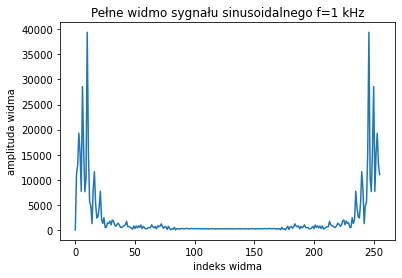

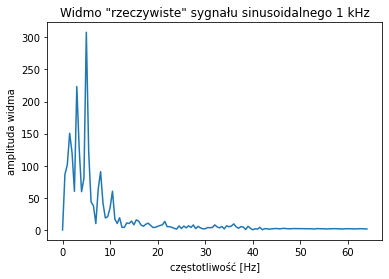

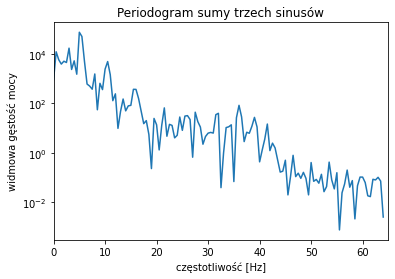

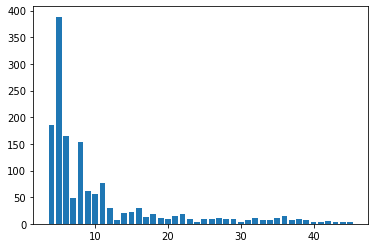

[263.3564505712476, 163.12011611873405, 45.996882831578944, 16.63308532256974, 8.322836151379901]
     POW.AF3.Theta  POW.AF3.Alpha  POW.AF3.BetaL  POW.AF3.BetaH  \
267    5856.304688     482.358276       57.93446      16.020817   

     POW.AF3.Gamma  POW.T7.Theta  POW.T7.Alpha  POW.T7.BetaL  POW.T7.BetaH  \
267       4.901997      1.995026      1.138177      0.830755      0.592742   

     POW.T7.Gamma  ...  POW.T8.Theta  POW.T8.Alpha  POW.T8.BetaL  \
267      0.652544  ...      2.389005      2.816155      1.509976   

     POW.T8.BetaH  POW.T8.Gamma  POW.AF4.Theta  POW.AF4.Alpha  POW.AF4.BetaL  \
267      1.088773       1.09899       177.3806      18.515409       8.522444   

     POW.AF4.BetaH  POW.AF4.Gamma  
267       3.313749        2.37857  

[1 rows x 25 columns]


<BarContainer object of 5 artists>

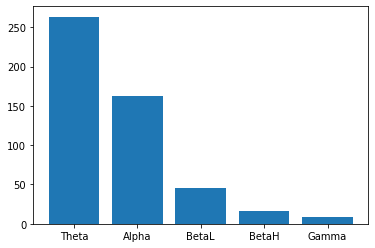

In [152]:
%matplotlib inline
import numpy as np
import scipy.signal as sig
from scipy.io import wavfile
import matplotlib.pyplot as plt
from itertools import chain

eeg=data_drop2(eeg=load_data(nazwy_plikow3[2]),label=2).drop("etykieta",1)
print(eeg[16:21])

dane=data_drop(eeg=load_data(nazwy_plikow3[2]),label=2).drop("etykieta",1)
dane=dane.drop(chain(range(12),range(268,2619)),axis=0)
dane-=dane.mean()
fs=128
widmo = np.fft.fft(dane["EEG.AF3"])
widmo_amp = np.abs(widmo)
plt.plot(widmo_amp)
plt.xlabel('indeks widma')
plt.ylabel('amplituda widma')
plt.title('Pełne widmo sygnału sinusoidalnego f=1 kHz')
plt.show()

widmo_amp = np.abs(np.fft.rfft(dane["EEG.AF3"])) / 128
f = np.fft.rfftfreq(256, 1/fs)
plt.plot(f, widmo_amp)
plt.xlabel('częstotliwość [Hz]')
plt.ylabel('amplituda widma')
plt.title('Widmo "rzeczywiste" sygnału sinusoidalnego 1 kHz')
plt.show()

fper, Pxx = sig.periodogram(dane["EEG.AF3"], fs, 'hamming', 256, scaling='density')
plt.semilogy(fper, Pxx)
plt.xlim(0, 65)
plt.xlabel('częstotliwość [Hz]')
plt.ylabel('widmowa gęstość mocy')
plt.title('Periodogram sumy trzech sinusów')
plt.show()

prazki=[0]*64
for i in range(64):
    prazki[i]=widmo_amp[i*2+1]+widmo_amp[i*2+2]
f2 = np.fft.rfftfreq(128, 1/fs)
plt.bar(f2[4:46], prazki[3:45])
plt.show()



power=[0]*5
power[0]=prazki[0]+prazki[1]+prazki[2]+prazki[3]+prazki[4] #4-8Hz Theta
power[1]=prazki[4]+prazki[5]+prazki[6]+prazki[7]+prazki[8] #8-12Hz Alpha
power[2]=prazki[8]+prazki[9]+prazki[10]+prazki[11]+prazki[12] #12-16Hz BetaL
power[3]=prazki[12]+prazki[13]+prazki[14]+prazki[15]+prazki[16]+prazki[17]+prazki[18]+prazki[19]+prazki[20]+prazki[21] #16-25Hz BetaH
power[4]=prazki[21]+prazki[22]+prazki[23]+prazki[24]+prazki[25]+prazki[26]+prazki[27]+prazki[28]+prazki[29]+prazki[30]+prazki[31]+prazki[32]+prazki[33]+prazki[34]+prazki[35]+prazki[36]+prazki[37]+prazki[38]+prazki[39]+prazki[40]+prazki[41] #25-45Hz Gamma

power[0]/=5
power[1]/=5
power[2]/=5
power[3]/=10
power[4]/=21

#for i,s in enumerate(power):
#    power[i] = s*s
print(power)
print(eeg[16:17])
plt.bar(['Theta','Alpha','BetaL','BetaH','Gamma'],height=power)

In [80]:
dane=data_drop(eeg=load_data(nazwy_plikow3[plik]),label=plik).drop("etykieta",1)
#dane=dane.drop(chain(range(12),range(268,2619)),axis=0)
#dane-=dane.mean()
dane_1s = pd.DataFrame(dane[:96],columns=['EEG.AF3', 'EEG.T7', 'EEG.Pz', 'EEG.T8', 'EEG.AF4'])
wariancja = pd.DataFrame(columns=['EEG.AF3', 'EEG.T7', 'EEG.Pz', 'EEG.T8', 'EEG.AF4'])
    
for i in range (96,2620,32):
    dane_1s = dane_1s.append(dane[i:i+32])
    s2 = np.var(dane_1s, ddof=1)
    dane_1s = dane_1s.iloc[32:]
    wariancja = wariancja.append(pd.DataFrame(np.sqrt(s2)).T)
    #print(s2)
    #print(np.sqrt(s2))
#print(wariancja) 
wariancja.to_csv('./pom2311_1_var/'+plik+'.csv')

EEG.AF3    381.828988
EEG.T7      14.874979
EEG.Pz      29.394579
EEG.T8      17.180699
EEG.AF4     62.006195
dtype: float64
EEG.AF3    372.324931
EEG.T7      15.554063
EEG.Pz      31.525540
EEG.T8      23.272953
EEG.AF4     59.941469
dtype: float64
EEG.AF3    296.607003
EEG.T7      19.502777
EEG.Pz      23.742568
EEG.T8      22.997802
EEG.AF4     63.692385
dtype: float64
EEG.AF3    302.543728
EEG.T7      20.278431
EEG.Pz      24.875721
EEG.T8      26.166583
EEG.AF4     62.468972
dtype: float64
EEG.AF3    362.182958
EEG.T7      14.623141
EEG.Pz      17.816612
EEG.T8      19.958440
EEG.AF4     57.782189
dtype: float64
EEG.AF3    352.604038
EEG.T7      10.992042
EEG.Pz      18.404195
EEG.T8      17.897165
EEG.AF4     53.977423
dtype: float64
EEG.AF3    341.410621
EEG.T7      12.829918
EEG.Pz      18.840632
EEG.T8      16.053988
EEG.AF4     57.622130
dtype: float64
EEG.AF3    332.509382
EEG.T7      13.923750
EEG.Pz      18.115105
EEG.T8      14.701995
EEG.AF4     59.822826
dtype: float64


In [148]:
%matplotlib inline
import numpy as np
import scipy.signal as sig
from scipy.io import wavfile
import matplotlib.pyplot as plt
from itertools import chain

fs=128
f = np.fft.rfftfreq(128, 1/fs)[4:46]
nazwy_kolumn = ['-']*210
nazwy_kolumn_band = ['-']*25
iter=0
iter2=0
elektrody=["EEG.AF3","EEG.T7","EEG.Pz","EEG.T8","EEG.AF4"]
pasma=["Theta","Alpha","BetaL","BetaH","Gamma"]
for ele in elektrody:
    for hz in f:
        nazwy_kolumn[iter] = ele+'_'+str(int(hz))+'Hz'
        iter+=1
    for i in range(5):
        nazwy_kolumn_band[iter2] = ele+'/'+pasma[i]
        iter2+=1    
fft=pd.DataFrame(columns=nazwy_kolumn)
band=pd.DataFrame(columns=nazwy_kolumn_band)
dane=data_drop(eeg=load_data(nazwy_plikow3[2]),label=2).drop("etykieta",1)
dane-=dane.mean()
dane_1s = pd.DataFrame(dane[:96],columns=['EEG.AF3', 'EEG.T7', 'EEG.Pz', 'EEG.T8', 'EEG.AF4'])   
for k in range (96,2620,32):
    fft_1s=[0]*210
    band1s=[0]*25
    dane_1s = dane_1s.append(dane[k:k+32])
    #dane_1s-=dane_1s.mean()
    for i in range(5):
        widmo_amp = np.abs(np.fft.rfft(dane_1s[elektrody[i]]))[4:46] / 64
        band1s[i*5+0]=widmo_amp[0]+widmo_amp[1]+widmo_amp[2]+widmo_amp[3]+widmo_amp[4] #4-8Hz Theta
        band1s[i*5+1]=widmo_amp[4]+widmo_amp[5]+widmo_amp[6]+widmo_amp[7]+widmo_amp[8] #8-12Hz Alpha
        band1s[i*5+2]=widmo_amp[8]+widmo_amp[9]+widmo_amp[10]+widmo_amp[11]+widmo_amp[12] #12-16Hz BetaL
        band1s[i*5+3]=widmo_amp[12]+widmo_amp[13]+widmo_amp[14]+widmo_amp[15]+widmo_amp[16]+widmo_amp[17]+widmo_amp[18]+widmo_amp[19]+widmo_amp[20]+widmo_amp[21] #16-25Hz BetaH
        band1s[i*5+4]=widmo_amp[21]+widmo_amp[22]+widmo_amp[23]+widmo_amp[24]+widmo_amp[25]+widmo_amp[26]+widmo_amp[27]+widmo_amp[28]+widmo_amp[29]+widmo_amp[30]+widmo_amp[31]+widmo_amp[32]+widmo_amp[33]+widmo_amp[34]+widmo_amp[35]+widmo_amp[36]+widmo_amp[37]+widmo_amp[38]+widmo_amp[39]+widmo_amp[40]+widmo_amp[41] #25-45Hz Gamma
        band1s[i*5+0]/=5
        band1s[i*5+1]/=5
        band1s[i*5+2]/=5
        band1s[i*5+3]/=10
        band1s[i*5+4]/=21
        for j in range(42):
            fft_1s[i*42+j]=widmo_amp[j]
    dane_1s = dane_1s.iloc[32:]        
    fft_1s = np.array(fft_1s).reshape(1, -1)
    fft_1s = pd.DataFrame(fft_1s, columns=nazwy_kolumn)
    fft=fft.append(fft_1s)
    band1s = np.array(band1s).reshape(1, -1)
    band1s = pd.DataFrame(band1s, columns=nazwy_kolumn_band)
    band=band.append(band1s)
print(fft)
print(band)


    EEG.AF3_4Hz  EEG.AF3_5Hz  EEG.AF3_6Hz  EEG.AF3_7Hz  EEG.AF3_8Hz  \
0     99.507590   322.888910   126.897528    35.033425    86.866859   
0     55.231460   370.821733    93.768613    43.029679    74.196598   
0    114.200938   288.198435   151.024752    90.400347    38.176537   
0    138.482822   310.987034   131.034275    69.785122    52.433944   
0    169.244602   313.011785   110.286120    41.330962    54.620193   
..          ...          ...          ...          ...          ...   
0    123.864795   182.199246   180.115400    66.502397   117.610797   
0    179.714984    80.868179   175.669998    22.293693    95.315751   
0    315.602391    17.356744   106.647922    60.028803   121.370716   
0    217.327821    58.001401   111.548176    52.118747    93.213901   
0    162.745912    99.077825    72.146746    90.681233    10.819901   

    EEG.AF3_9Hz  EEG.AF3_10Hz  EEG.AF3_11Hz  EEG.AF3_12Hz  EEG.AF3_13Hz  ...  \
0     28.944294     68.689270     56.740465     12.141942      6.03

In [150]:
for plik in range(8):
    fft_band(plik)

In [ ]:
import os
os.chdir("C:\\Users\\Toshiba\\Desktop\\ML\\wyniki\\napięcia")
l = list(os.listdir())
print(l)
razem=pd.DataFrame(columns=[0])
for plik in l:
    razem=pd.concat([razem,pd.read_excel(plik)],axis=1)
#razem=razem.dropna()  
razem=razem.drop(0,axis=1)
razem=razem.drop("0",axis=1)

s=[" "]*len(l)
i=0
print(razem)
for string in l:
    s[i]=string.rsplit("_")[0]
    i+=1
razem.columns = s    
razem.to_excel("wszystkie.xlsx")    

print(razem)